In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv('Mall_Customers.csv')

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


____                

**Dataset Information:**

- **Missing Values:** None
- **Dataset Size:** 200 rows x 5 columns

**Features:**

1. Gender
2. Age
3. Annual Income

**Target Feature:**

- Spending Score (1-100)


___                

             

## Univariate Analysis

In [8]:
df.iloc[:, 1:].describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [ ]:
#peaple betwen 36 years and 49 years are the game how spend alot

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
Columns=list(df.columns)

# in our analyst we don't need to ID and gender columns

Columns.remove('CustomerID') 

Columns.remove('Gender') 

Columns 

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


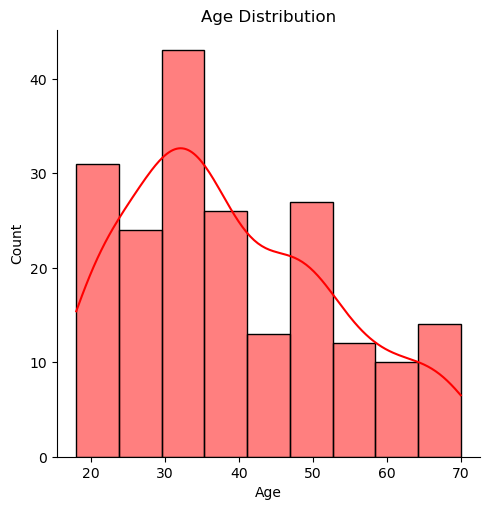

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


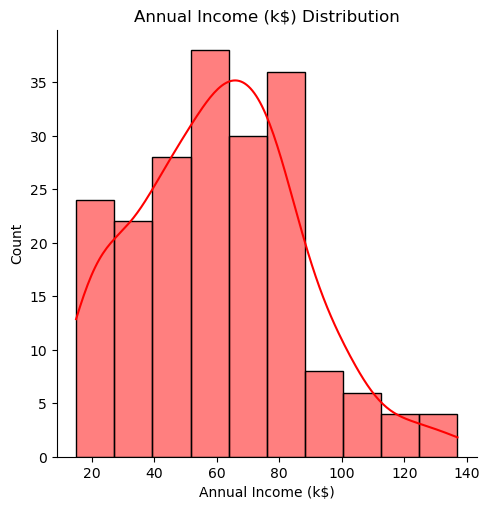

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


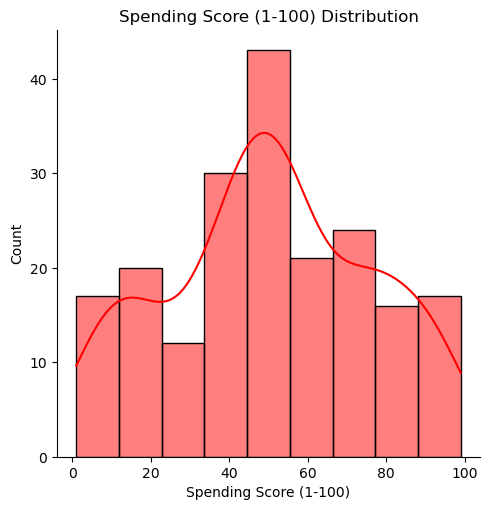

In [16]:
for i in Columns:
    print("\n")
    
    
    # Create a displot for each column
    
    sns.displot(df[i], kde=True, label=i, color="r")
    
    
    # Set the title for the current plot
    
    plt.title(f"{i} Distribution")
    
    
    # Display the plot
    
    plt.show()
    
    print("\n")

In [17]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [18]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

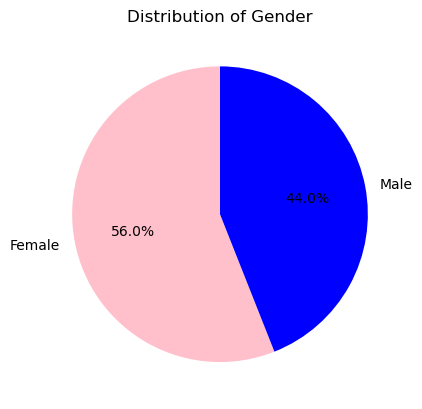

In [19]:
gender_counts = df['Gender'].value_counts()


# Create a pie chart with percentage labels
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'blue'])


# Set the title for the pie chart
plt.title('Distribution of Gender')


# Display the plot
plt.show()

_____

**KDE :**

Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable

____

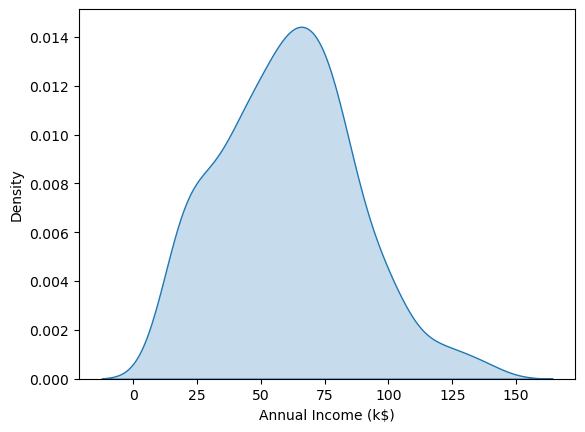

In [13]:
sns.kdeplot(df['Annual Income (k$)'], shade=True, label='Annual Income (k$)')
plt.show()

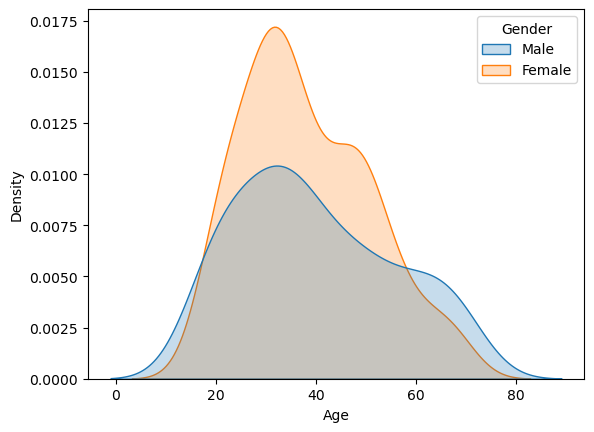

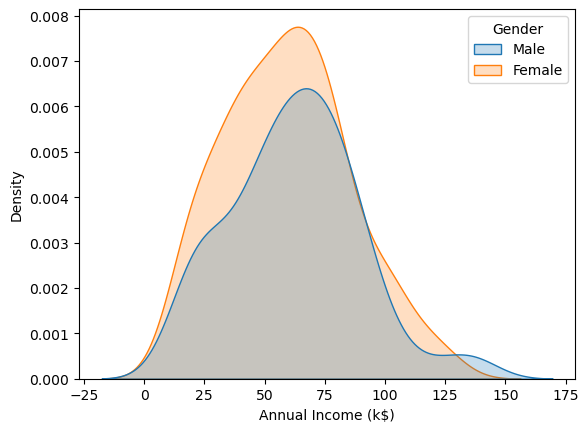

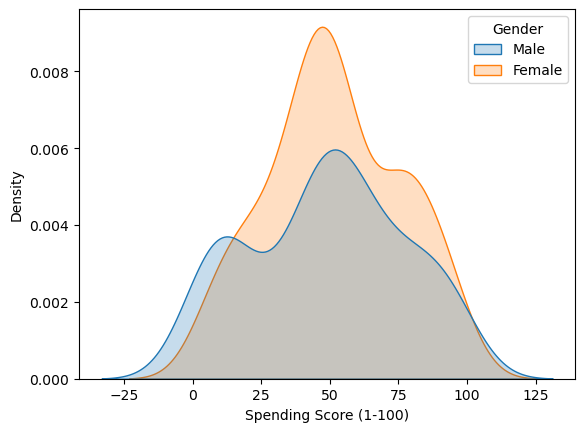

In [14]:
for i in Columns:
    sns.kdeplot(df[i], shade=True,hue=df['Gender'] , label=i)
    plt.show()

In [20]:
#we look tha women spend more than man

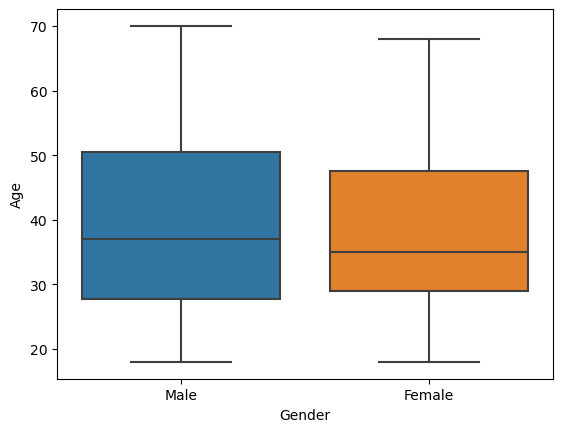

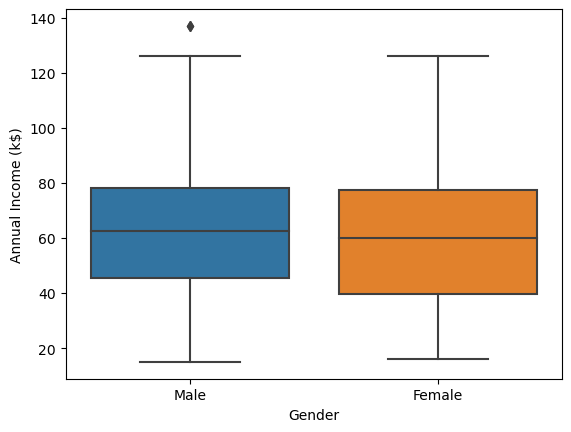

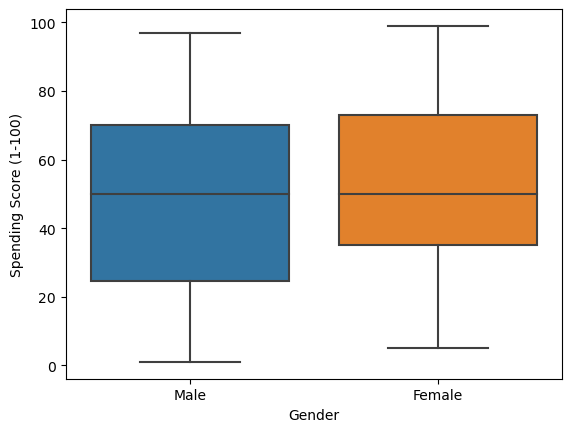

In [21]:
for i in Columns:
    sns.boxplot(data=df,x="Gender",y=i)
    plt.show()

## Bivariate Analysis 

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


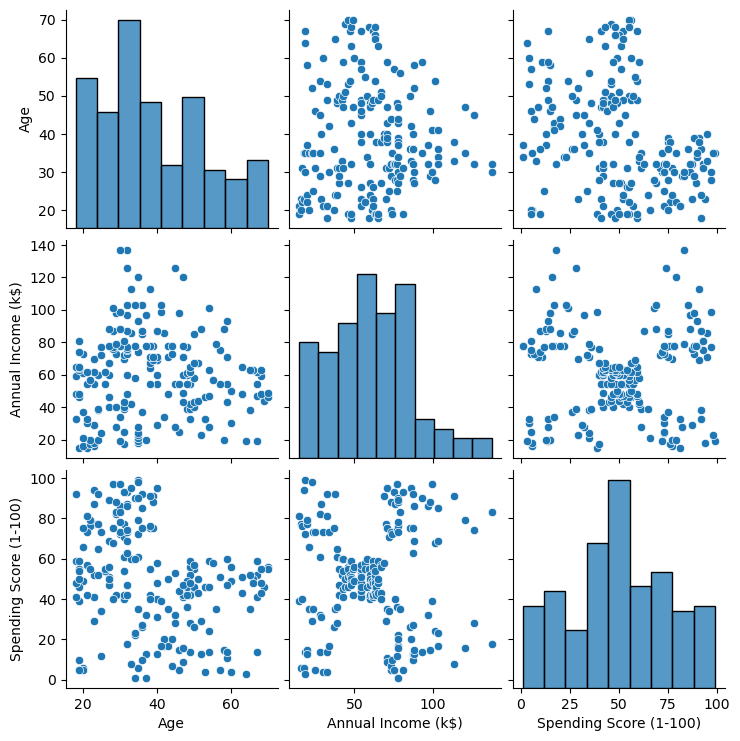

In [29]:
# overview , identify the number of clusters

sns.pairplot(df.iloc[:, 1:])
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


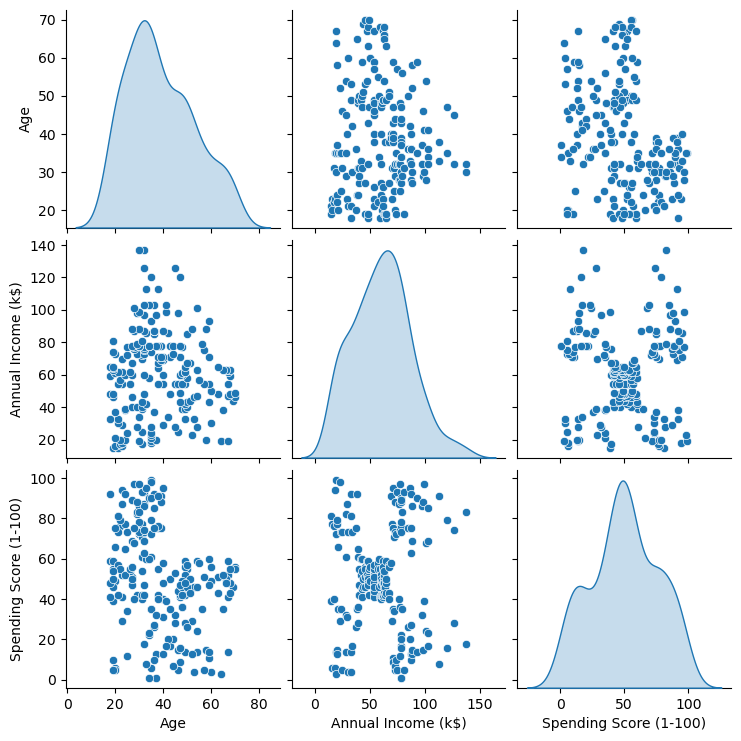

In [30]:
# same thing as above but with a grid

sns.pairplot(df.iloc[:, 1:], diag_kind="kde")
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


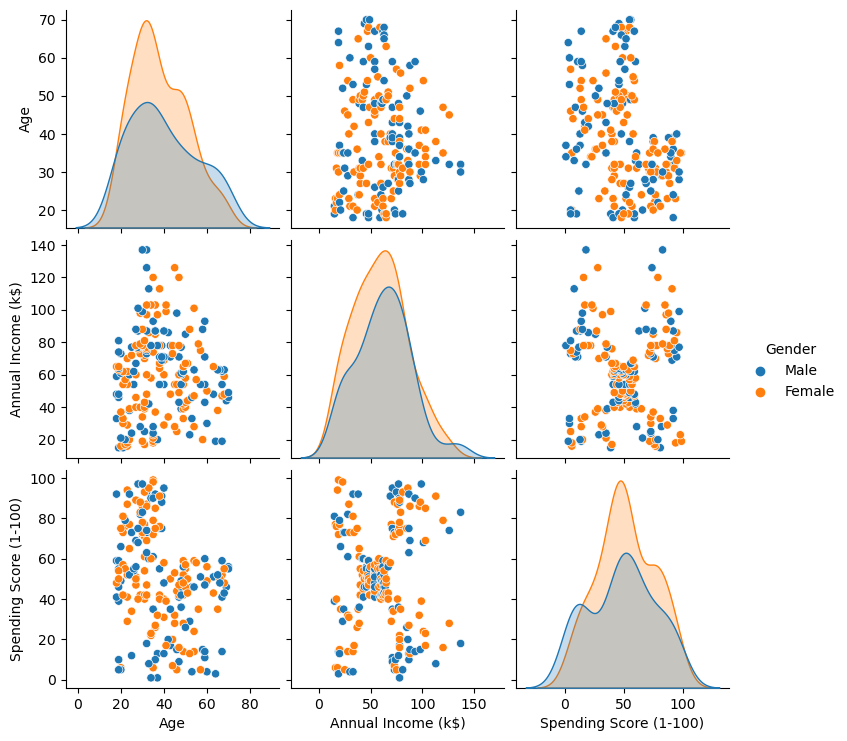

In [31]:
# with a focus on the difference between male and female

sns.pairplot(df.iloc[:, 1:], hue="Gender")
plt.show()

In [32]:
# mean values based en Gender 


df.groupby(["Gender"])[Columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [59]:
# 8 clusters by default (n_clusters=8)

clustering1=KMeans( n_clusters=6,n_init=10)

In [37]:
clustering1

KMeans(n_clusters=6, n_init=10)

In [38]:
clustering1.fit(df[['Annual Income (k$)']])

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, n_init=10)

In [39]:
# labels
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1,
       1, 1])

In [40]:
# adding "clustering1.labels_" to the initial dataframe

df['IncomeCluster']=clustering1.labels_

df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster
119,120,Female,50,67,57,3
67,68,Female,68,48,48,4
1,2,Male,21,15,81,2
92,93,Male,48,60,49,0
193,194,Female,38,113,91,1
108,109,Male,68,63,43,0
125,126,Female,31,70,77,3
9,10,Female,30,19,72,2
34,35,Female,49,33,14,4
147,148,Female,32,77,74,3


In [41]:
df['IncomeCluster'].value_counts()

IncomeCluster
3    46
0    44
4    42
2    32
5    28
1     8
Name: count, dtype: int64

In [42]:
clustering1.inertia_

5081.484660267269

In [43]:
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

In [44]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3949.2756132756135,
 2881.482051282051,
 2316.4222018951123,
 1736.565651015651]

In [46]:
df.groupby(['IncomeCluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().T

IncomeCluster,0,1,2,3,4,5
Age,41.613636,36.500,34.90625,35.956522,43.000000,38.214286
Annual Income (k$),59.454545,124.000,22.00000,74.391304,42.238095,93.000000
Spending Score (1-100),49.045455,49.625,49.65625,50.913043,50.666667,50.928571


In [47]:
clustering2 = KMeans(n_init=10,n_clusters=5)
clustering2

KMeans(n_clusters=5, n_init=10)

In [48]:
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=10)

In [49]:
clustering2.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 2, 4, 3, 4, 3, 4,
       2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [50]:
df['Spending and Income Cluster'] = clustering2.labels_

df.sample(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster,Spending and Income Cluster
66,67,Female,43,48,50,4,2
12,13,Female,58,20,15,2,1
127,128,Male,40,71,95,3,4
54,55,Female,50,43,45,4,2
135,136,Female,29,73,88,3,4
60,61,Male,70,46,56,4,2
129,130,Male,38,71,75,3,4
84,85,Female,21,54,57,0,2
9,10,Female,30,19,72,2,0
70,71,Male,70,49,55,4,2


In [51]:
intertia_scores2=[]

for i in range(1,11):
    kmeans2=KMeans(n_clusters=i,n_init=10)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

In [54]:
Centers = clustering2.cluster_centers_

In [55]:
Centers

array([[25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513]])

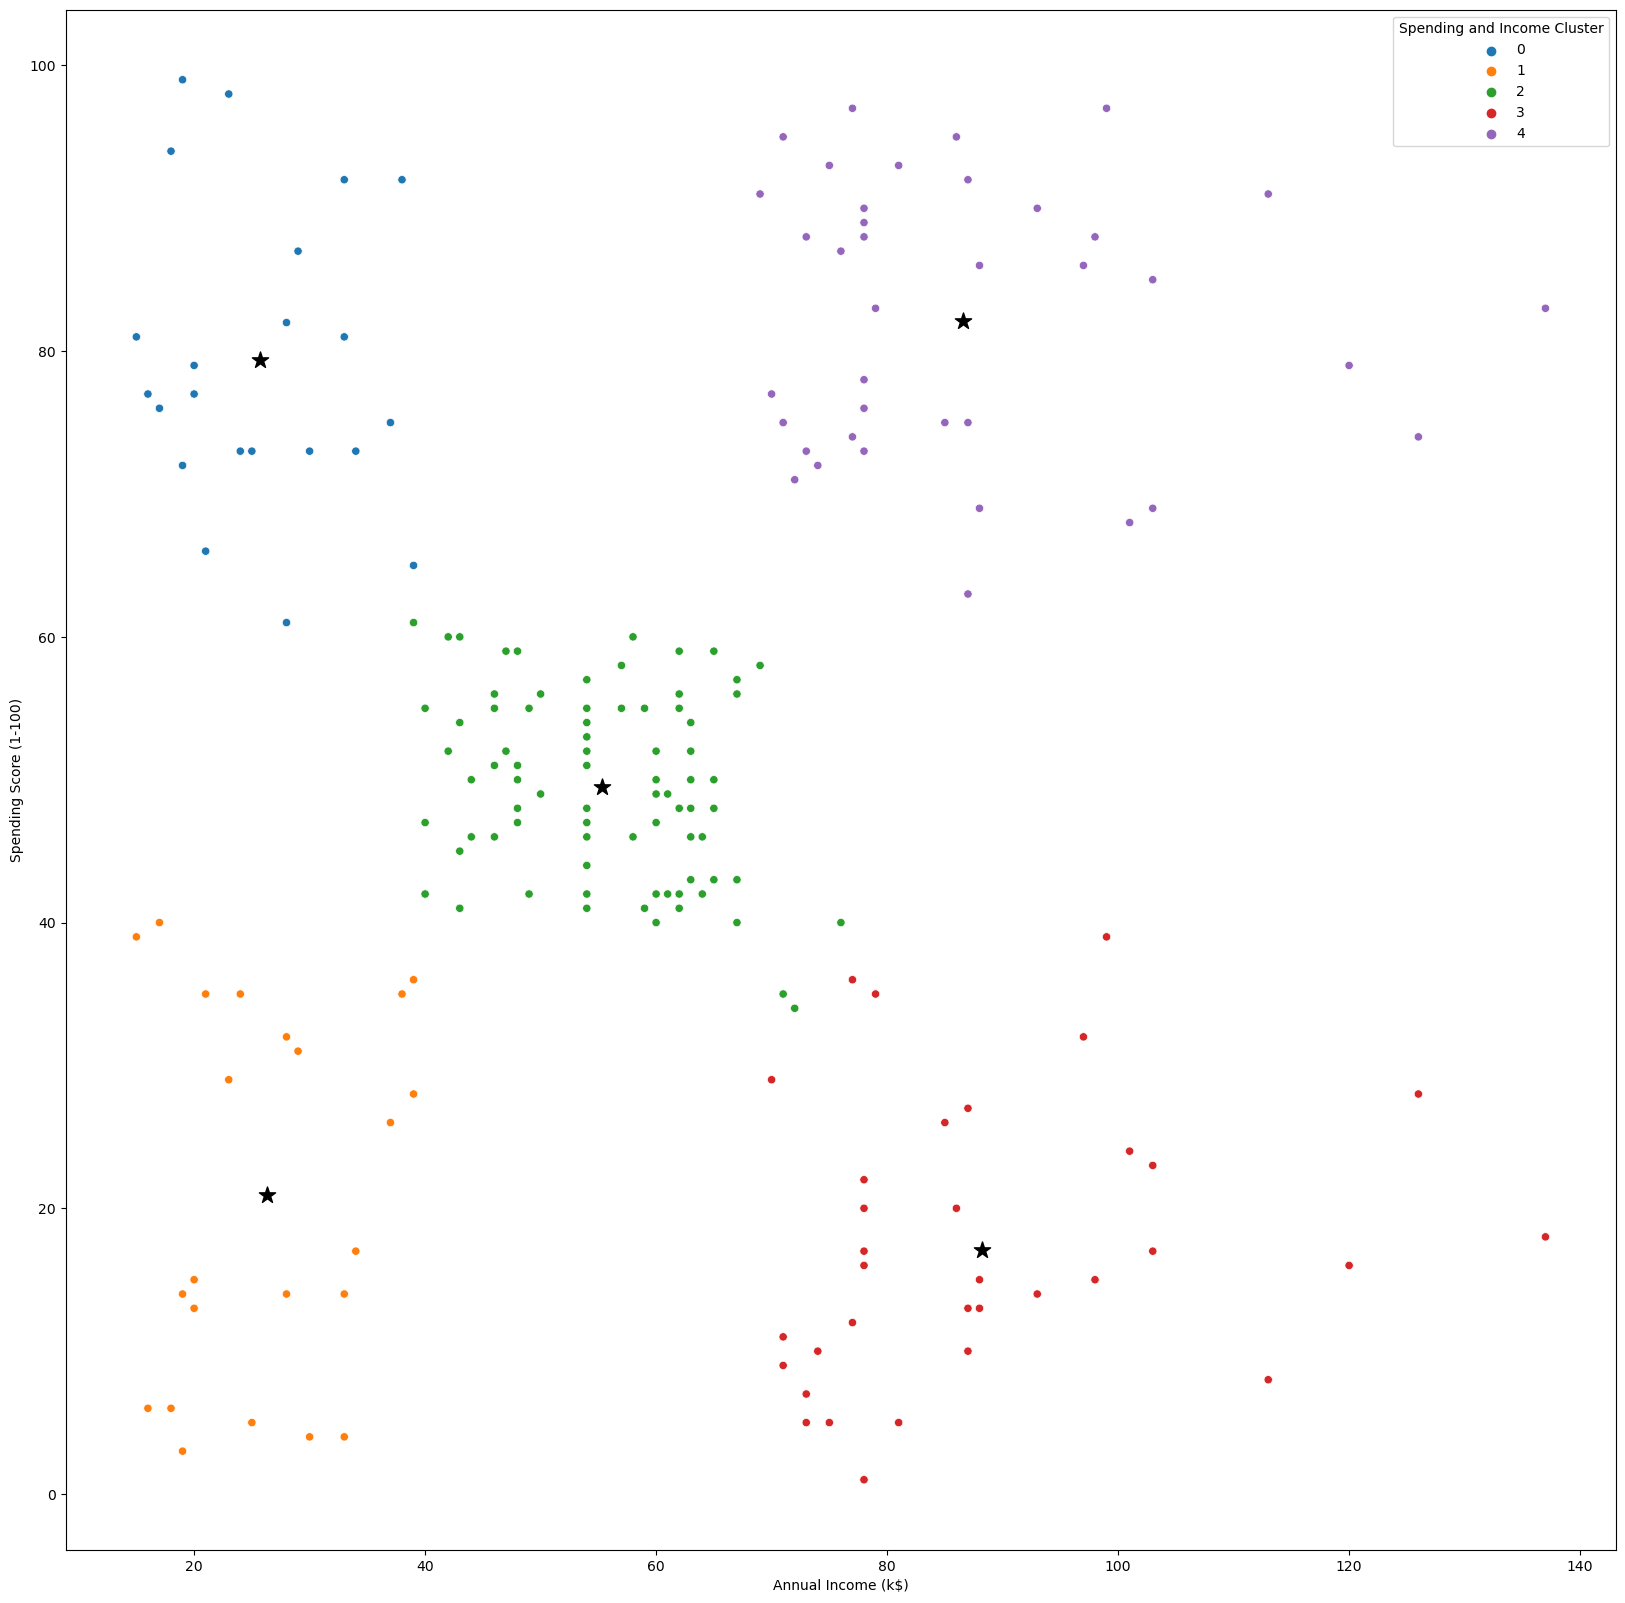

In [56]:
plt.figure(figsize=(20,20))

for i in range(5):
    plt.scatter(x=Centers[i][0],y=Centers[i][1],s=150,c='black',marker='*')

sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

plt.show()

### we have 5 class of custmer how had higher wage and spend alot besides how had higher wage but they don't spend many moreover how had small wage and spend lot in and how had small wage and spend less so the copagnie shoud work to atract the class ho had lot many but they don' spend many